## Online Evaluators

때때로 프로젝트에 기록된 생성물을 평가하고자 할 때가 있습니다.

In [ ]:
# 설치
# !pip install -qU langsmith langchain-teddynote

In [ ]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

In [ ]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH16-Auto-Evaluation-Test")

## 온라인 Evaluation을 위한 Chain 설정

In [ ]:
from myrag import PDFRAG
from langchain_openai import ChatOpenAI

# PDFRAG 객체 생성
rag = PDFRAG(
    "data/SPRI_AI_Brief_2023년12월호_F.pdf",
    ChatOpenAI(model="gpt-4o-mini", temperature=0),
)

# 검색기(retriever) 생성
retriever = rag.create_retriever()

# 체인(chain) 생성
rag_chain = rag.create_chain(retriever)

In [ ]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough

# RunnableParallel 객체 생성합니다.
evaluation_runnable = RunnableParallel(
    {
        "context": retriever,
        "answer": rag_chain,
        "question": RunnablePassthrough(),
    }
)

테스트 체인을 실행하여 Runs 에 결과가 반영되는지 확인합니다.

In [ ]:
# 체인 실행
_ = evaluation_runnable.invoke("삼성전자가 자체 개발한 생성형 AI의 이름은 무엇인가요?")

## Online LLM-as-judge 생성

> Online LLM-as-judge 생성

![](./assets/online-eval-01.png)

> Secrets & API Keys 지정(OpenAI API Key)

![](./assets/online-eval-02.png)

> Provider, Model, Prompt 설정

![](./assets/online-eval-03.png)

> facts 에는 output.context 지정 (본인의 설정에 맞게 변경)

![](./assets/online-eval-04.png)

> answer 에는 output.answer 지정 (본인의 설정에 맞게 변경)

![](./assets/online-eval-05.png)

> Preview 로 데이터가 올바른 곳에 입력되었는지 확인

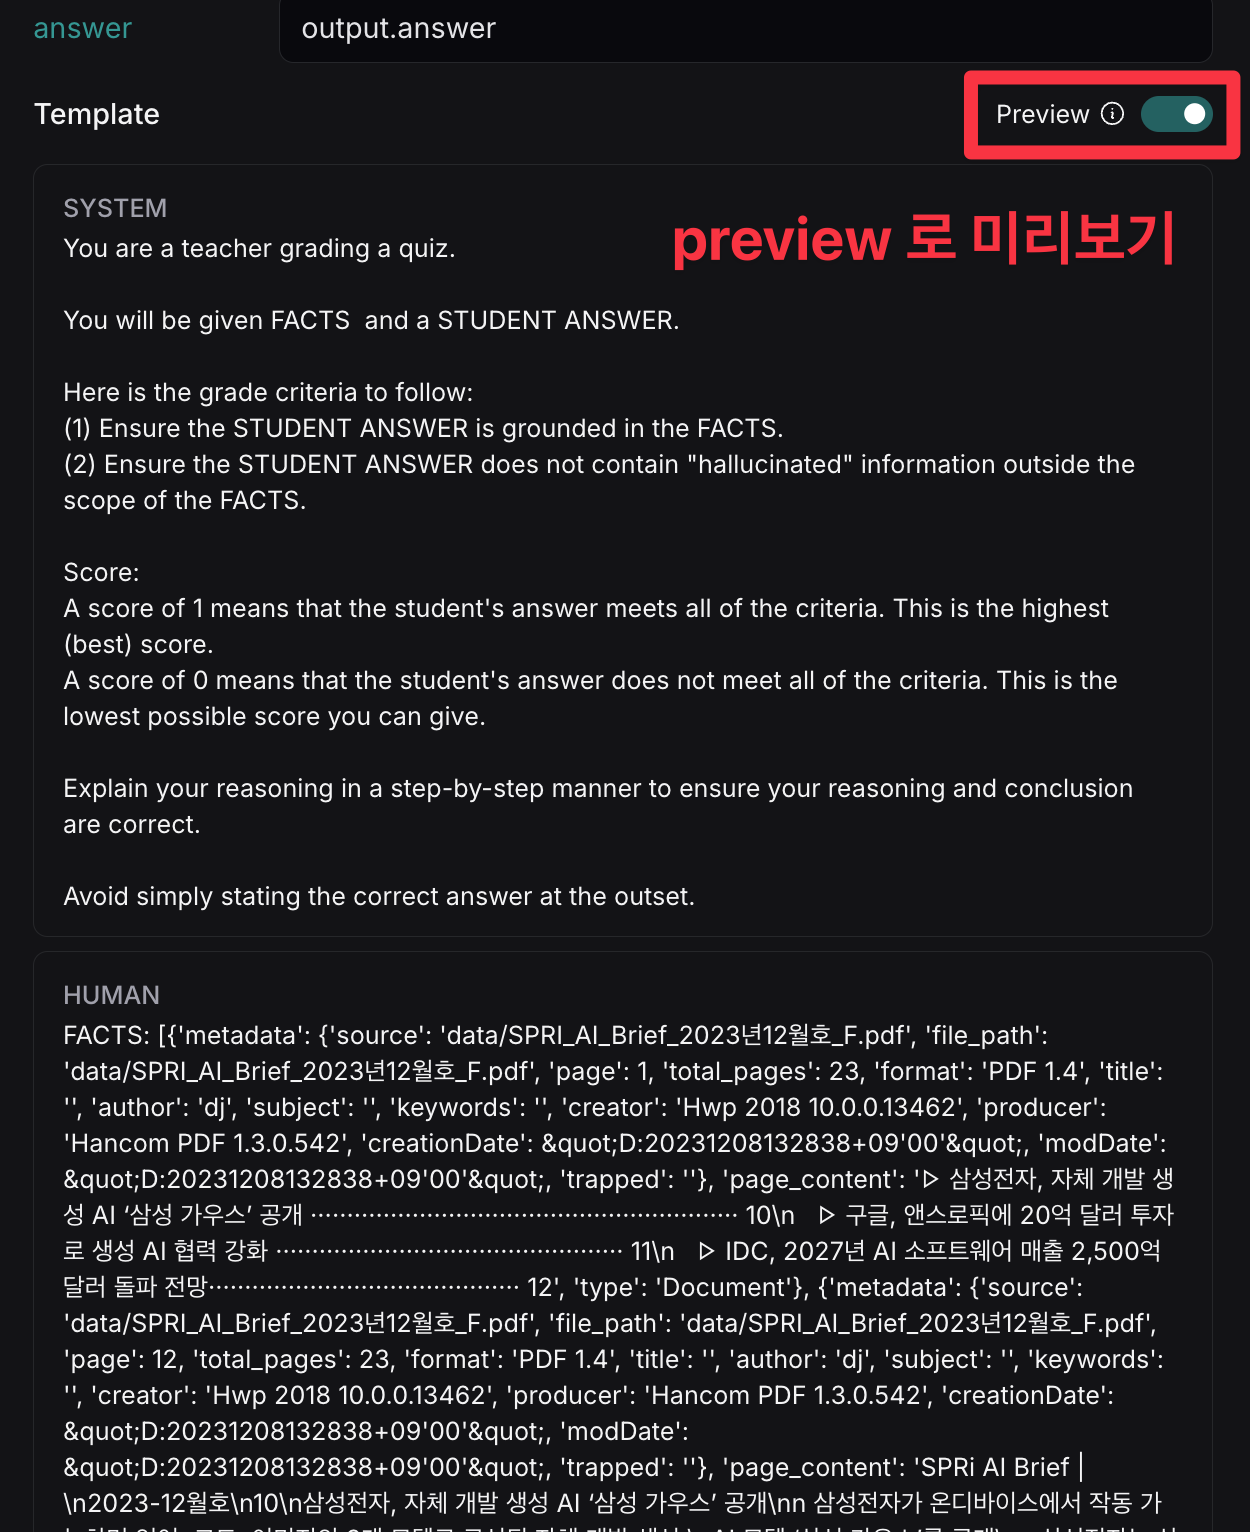

**주의**

반드시 Preview 를 확인 후, 다시 Preview 모드를 꺼야 다음 단계로 넘어갈 수 있습니다.

> Grade 확인 후 저장

![](./assets/online-eval-07.png)

## Tag 생성

모든 단계를 Evaluation 하지 않고, Tag를 설정하여 특정 Tag 에 대해서만 평가할 수 있습니다.

> Edit Rule 로 수정

![](./assets/online-eval-08.png)

> 태그 설정 (원하는 태그를 입력)

![](./assets/online-eval-09.png)

> 특정 태그에 대해서만 평가 실행

![](./assets/online-eval-10.png)

In [ ]:
from langchain_core.runnables import RunnableConfig

# 태그를 설정합니다.
hallucination_config = RunnableConfig(tags=["hallucination_eval"])
context_recall_config = RunnableConfig(tags=["context_recall_eval"])
all_eval_config = RunnableConfig(tags=["hallucination_eval", "context_recall_eval"])

In [ ]:
# 체인 실행
_ = evaluation_runnable.invoke("삼성전자가 자체 개발한 생성형 AI의 이름은 무엇인가요?")

In [ ]:
# Hallucination 평가 요청
_ = evaluation_runnable.invoke(
    "삼성전자가 자체 개발한 생성형 AI의 이름은 무엇인가요?", config=hallucination_config
)

In [ ]:
# Context Recall 평가 요청
_ = evaluation_runnable.invoke(
    "삼성전자가 자체 개발한 생성형 AI의 이름은 무엇인가요?",
    config=context_recall_config,
)

In [ ]:
# 모든 평가 요청
_ = evaluation_runnable.invoke(
    "삼성전자가 자체 개발한 생성형 AI의 이름은 무엇인가요?", config=all_eval_config
)